<a href="https://colab.research.google.com/github/AkiraKane/Deep-Learning-with-Tensorflow-Keras-PyTorch/blob/master/Shallow_net_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip freeze | grep tensorflow

mesh-tensorflow==0.1.9
tensorflow==1.15.0
tensorflow-datasets==2.0.0
tensorflow-estimator==1.15.1
tensorflow-gan==2.0.0
tensorflow-hub==0.7.0
tensorflow-metadata==0.21.1
tensorflow-privacy==0.2.2
tensorflow-probability==0.7.0


In [3]:
! pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 52kB/s 
     |████████████████████████████████| 450kB 47.3MB/s 
     |████████████████████████████████| 3.8MB 50.8MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


Loading Dependencies

In [0]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

Loading Data

In [6]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

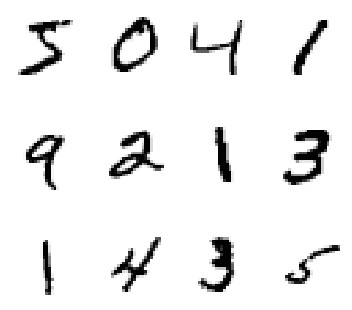

In [10]:
plt.figure(figsize=(5, 5))
for k in range(12):
  plt.subplot(3, 4, k+1)
  plt.imshow(X_train[k], cmap="Greys")
  plt.axis("off")
plt.tight_layout()
plt.show()

In [11]:
X_valid.shape

(10000, 28, 28)

In [12]:
y_valid.shape

(10000,)

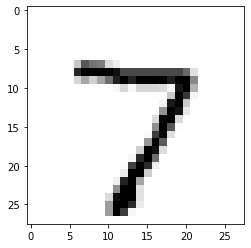

In [13]:
plt.imshow(X_valid[0], cmap="Greys")

In [14]:
y_valid[0]

7

Preprocess Data

In [0]:
X_train = X_train.reshape(60000, 784).astype("float32")

In [0]:
X_valid = X_valid.reshape(10000, 784).astype("float32")

In [0]:
X_train /= 255
X_valid /= 255

In [0]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [21]:
y_valid[0:3]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Design NN architecture

In [0]:
model = Sequential()

# hidden layer
model.add(Dense(64, activation="sigmoid", input_shape=(784, )))

# output layer
model.add(Dense(10, activation="softmax"))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Compile Model

In [0]:
model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01), metrics=["accuracy"])

Train Model

In [26]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0967 - accuracy: 0.0987 - val_loss: 0.0934 - val_accuracy: 0.0980
Epoch 2/200
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0924 - accuracy: 0.0992 - val_loss: 0.0917 - val_accuracy: 0.1014
Epoch 3/200
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0913 - accuracy: 0.1023 - val_loss: 0.0908 - val_accuracy: 0.1074
Epoch 4/200
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0905 - accuracy: 0.1164 - val_loss: 0.0902 - val_accuracy: 0.1285
Epoch 5/200
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0900 - accuracy: 0.1362 - val_loss: 0.0897 - val_accuracy: 0.1533
Epoch 6/200
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0895 - accuracy: 0.1697 - val_loss: 0.0892 - val_accuracy: 0.2109
Epoch 7/200
60000/60000 [=========================

Evaluate model performance

In [27]:
model.evaluate(X_valid, y_valid)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.027296057876944543, 0.8672]

Perform Inference

In [28]:
valid_0 = X_valid[0].reshape(1, 784)
model.predict(valid_0)

array([[4.7935778e-03, 8.9352787e-04, 2.9118864e-03, 8.5167969e-03,
        4.6692216e-03, 1.1218097e-02, 3.8215294e-04, 9.2607760e-01,
        2.6825618e-03, 3.7854619e-02]], dtype=float32)

In [29]:
model.predict_classes(valid_0)

array([7])